In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-06-02 05:47:19--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  39.4MB/s    in 4.3s    

2023-06-02 05:47:24 (33.1 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]

--2023-06-02 05:47:24--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11

In [2]:
import zipfile
local_zip='/content/horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./horse-or-human')

local_zip='/content/validation-horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./validation-horse-or-human')



In [3]:
zip_ref.close()

In [4]:
import os

train_horse_dir=os.path.join('/content/horse-or-human/horses')
train_human_dir=os.path.join('/content/horse-or-human/humans')

validation_horse_dir=os.path.join('/content/validation-horse-or-human/horses')
validation_human_dir=os.path.join('/content/validation-horse-or-human/humans')

In [5]:
train_horse_names=os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse24-7.png', 'horse39-3.png', 'horse05-7.png', 'horse46-8.png', 'horse14-6.png', 'horse21-1.png', 'horse13-1.png', 'horse42-0.png', 'horse26-8.png', 'horse03-9.png']
TRAIN SET HUMANS: ['human12-07.png', 'human12-17.png', 'human07-23.png', 'human04-05.png', 'human16-08.png', 'human13-26.png', 'human03-29.png', 'human17-24.png', 'human10-20.png', 'human16-04.png']
VAL SET HORSES: ['horse4-159.png', 'horse2-383.png', 'horse4-389.png', 'horse5-360.png', 'horse3-026.png', 'horse1-000.png', 'horse5-303.png', 'horse4-014.png', 'horse4-541.png', 'horse5-478.png']
VAL SET HUMANS: ['valhuman03-19.png', 'valhuman03-09.png', 'valhuman05-26.png', 'valhuman02-09.png', 'valhuman05-19.png', 'valhuman04-16.png', 'valhuman03-24.png', 'valhuman05-12.png', 'valhuman02-04.png', 'valhuman03-14.png']


In [6]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

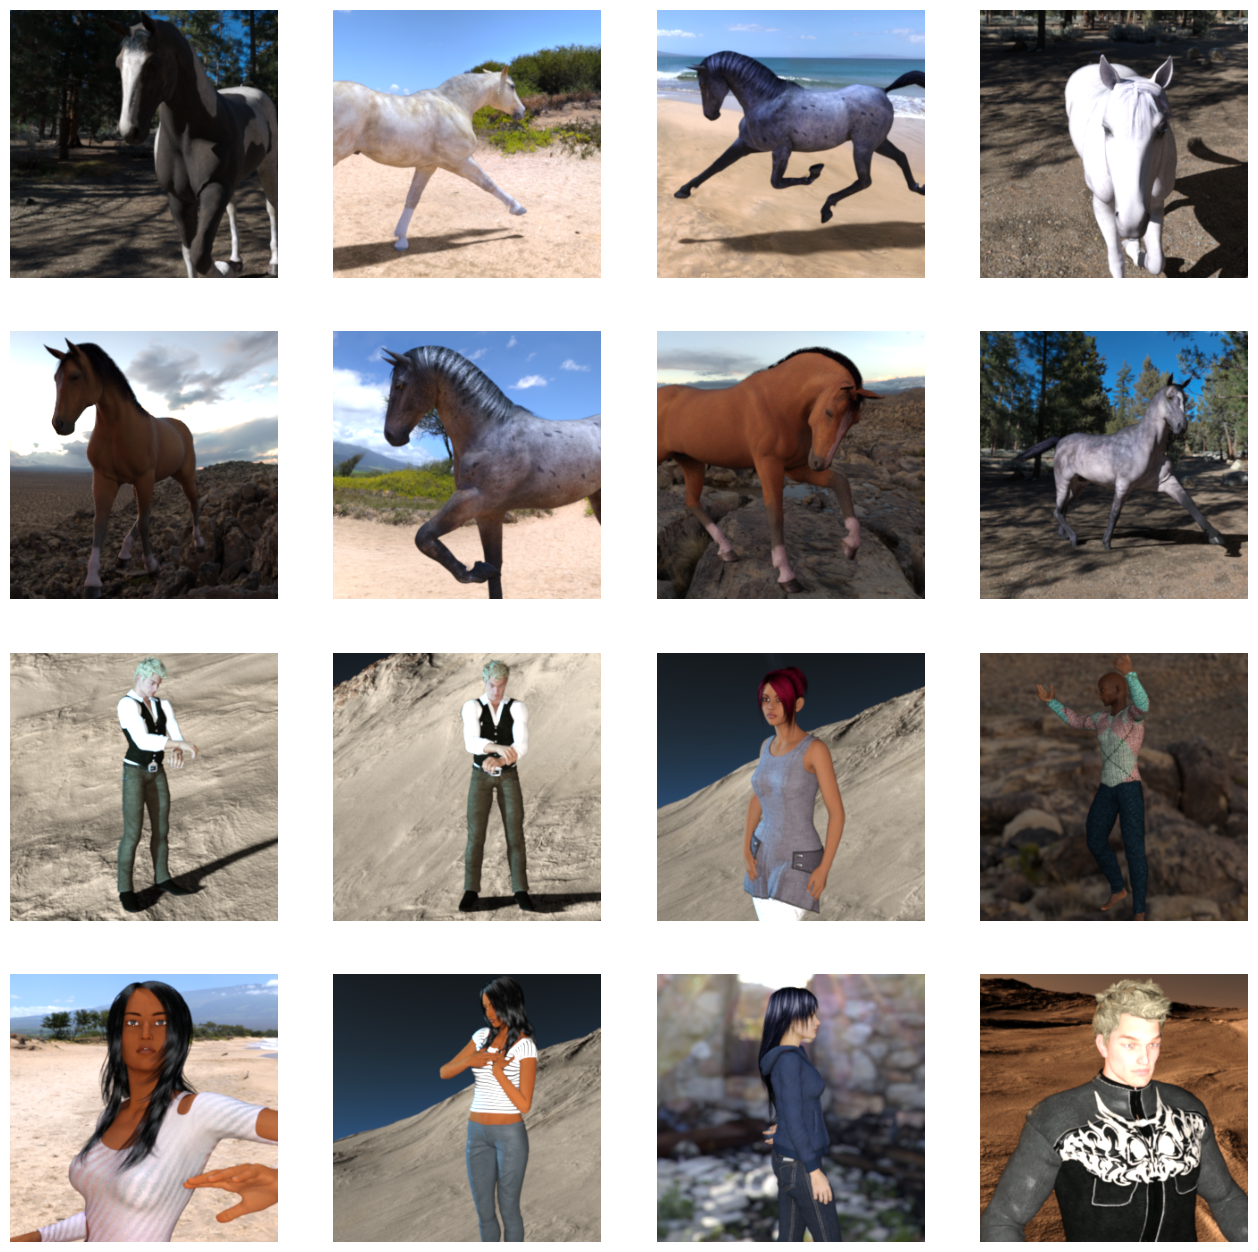

In [8]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
##Building the classifier

import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [11]:
#Data Preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    '/content/horse-or-human',
    batch_size=128,
    target_size=(300,300),
    class_mode='binary'
)

validation_generator=validation_datagen.flow_from_directory(
    '/content/validation-horse-or-human',
    batch_size=16,
    target_size=(300,300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 26s 2s/step - loss: 0.6929 - accuracy: 0.5039 - val_loss: 0.6712 - val_accuracy: 0.5312
Epoch 2/15
8/8 [==============================] - 8s 941ms/step - loss: 0.7146 - accuracy: 0.6630 - val_loss: 0.6541 - val_accuracy: 0.7500
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 0.6815 - accuracy: 0.7419 - val_loss: 0.5521 - val_accuracy: 0.7266
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 0.8736 - accuracy: 0.7019 - val_loss: 1.7525 - val_accuracy: 0.4844
Epoch 5/15
8/8 [==============================] - 8s 919ms/step - loss: 0.5830 - accuracy: 0.7898 - val_loss: 0.5338 - val_accuracy: 0.7969
Epoch 6/15
8/8 [==============================] - 8s 994ms/step - loss: 0.3062 - accuracy: 0.8676 - val_loss: 0.5364 - val_accuracy: 0.7656
Epoch 7/15
8/8 [==============================] - 8s 1s/step - loss: 0.2962 - accuracy: 0.8799 - val_loss: 0.3814 - val_accuracy: 0.8516
Epoch 8/15
8/8 [===============

Reaches a max of 98% accuracy for training set and 87% for validation set

#Exploring the effects of compressing images 

In [13]:
import tensorflow as tf

model2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution (You can uncomment the 4th and 5th conv layers later to see the effect)
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fifth convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 64)      

In [14]:
from tensorflow.keras.optimizers import RMSprop

model2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator2=train_datagen.flow_from_directory(
    '/content/horse-or-human',
    batch_size=128,
    target_size=(150,150),
    class_mode='binary'
)

validation_generator2=validation_datagen.flow_from_directory(
    '/content/validation-horse-or-human',
    batch_size=32,
    target_size=(150,150),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [16]:
history = model2.fit(
      train_generator2,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator2,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 10s 872ms/step - loss: 1.0608 - accuracy: 0.4783 - val_loss: 0.6705 - val_accuracy: 0.5078
Epoch 2/15
8/8 [==============================] - 6s 712ms/step - loss: 0.6423 - accuracy: 0.6830 - val_loss: 0.6687 - val_accuracy: 0.5156
Epoch 3/15
8/8 [==============================] - 6s 820ms/step - loss: 0.6760 - accuracy: 0.6541 - val_loss: 0.4492 - val_accuracy: 0.8594
Epoch 4/15
8/8 [==============================] - 7s 819ms/step - loss: 0.4700 - accuracy: 0.8209 - val_loss: 0.4029 - val_accuracy: 0.8281
Epoch 5/15
8/8 [==============================] - 6s 795ms/step - loss: 0.2251 - accuracy: 0.9210 - val_loss: 0.4148 - val_accuracy: 0.8516
Epoch 6/15
8/8 [==============================] - 6s 717ms/step - loss: 0.2794 - accuracy: 0.8754 - val_loss: 0.6893 - val_accuracy: 0.8047
Epoch 7/15
8/8 [==============================] - 7s 827ms/step - loss: 0.1189 - accuracy: 0.9600 - val_loss: 1.6999 - val_accuracy: 0.7344
Epoch 8/15
8/8 [===

Model2 shows overfitting

Model2 Predictions

In [18]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model2.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving woman-g4e2244490_1280.jpg to woman-g4e2244490_1280.jpg
Saving woman-ge14b8b280_1280.jpg to woman-ge14b8b280_1280.jpg
1/1 [==============================] - 0s 19ms/step
[0.00264808]
woman-g4e2244490_1280.jpg is a horse
1/1 [==============================] - 0s 20ms/step
[0.9996908]
woman-ge14b8b280_1280.jpg is a human


Model 1 Predictions

In [20]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving woman-g4e2244490_1280.jpg to woman-g4e2244490_1280 (2).jpg
Saving woman-ge14b8b280_1280.jpg to woman-ge14b8b280_1280 (2).jpg
1/1 [==============================] - 0s 257ms/step
[0.00967367]
woman-g4e2244490_1280.jpg is a horse
1/1 [==============================] - 0s 21ms/step
[0.9137091]
woman-ge14b8b280_1280.jpg is a human


Model 2 might show some errors while testing but those are  classified correctly by model 1. 
Dataset can be edited to have best effects on training